___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

## The Approach 


# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
# import dataframes
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")


# merge dataframes
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# Copy dataframe for manipulating 
df_copy = df.copy()

In [4]:
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  ...  Gender       Date  \
0                     71               319  ...    Male   4-Oct-10   
1                     67               344  ...    Male   4-Oct-10   
2                     75               345  ...    Male   4-Oct-10   
3                     73               328  ...    Male  12-Oct-10   
4                     80               340  ...    Male  12-Oct-10   
...                  ...               ...  ...     ...        ...   
6063                  72               306  ...  Female   5-Apr-12   
6064                  66               309  ...  Female   5-Apr-12   
6065        

In [5]:
# Height and weight are repeated
## drop the self_reported
## Convert the unit of weight
df_copy.loc[:, ["weightkg", "Weightlbs", "Heightin", "stature"]]
df_copy["weightkg"] = df_copy["weightkg"] / 10
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  ...  Gender       Date  \
0                     71               319  ...    Male   4-Oct-10   
1                     67               344  ...    Male   4-Oct-10   
2                     75               345  ...    Male   4-Oct-10   
3                     73               328  ...    Male  12-Oct-10   
4                     80               340  ...    Male  12-Oct-10   
...                  ...               ...  ...     ...        ...   
6063                  72               306  ...  Female   5-Apr-12   
6064                  66               309  ...  Female   5-Apr-12   
6065        

## Explore Data

In [6]:
# Descriptive statistics of the numerical variables 
df_copy.describe()

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
count 6068.000   4082.000                        6068.000        6068.000   
mean  1697.499  20003.371                         246.469        1406.161   
std   1133.004   6568.435                          37.400          79.091   
min      0.000  10027.000                         155.000        1115.000   
25%    758.000  14270.250                         219.000        1350.000   
50%   1516.500  17236.500                         242.000        1410.000   
75%   2564.250  27315.750                         271.000        1462.000   
max   4081.000  29452.000                         451.000        1683.000   

       acromionradialelength  anklecircumference  axillaheight  \
count               6068.000            6068.000      6068.000   
mean                 327.374             224.891      1299.609   
std                   20.720              16.052        72.022   
min                  249.000             156.000      1038.000   
25%                  313.000             214.000      1249.000   
50%                  328.000             225.000      1302.000   
75%                  341.250             235.000      1349.000   
max                  393.000             293.000      1553.000   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                 6068.000          6068.000           6068.000   
mean                   244.193           194.755            399.204   
std                     16.845            13.516             30.237   
min                    186.000           151.000            283.000   
25%                    232.000           185.000            376.000   
50%                    245.000           195.000            404.000   
75%                    256.000           204.000            421.000   
max                    306.000           245.000            489.000   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                   6068.000          6068.000          6068.000   
mean                     340.934           274.735           490.754   
std                       41.520            19.221            42.136   
min                      216.000           197.000           357.000   
25%                      311.000           262.000           460.000   
50%                      341.000           274.000           492.000   
75%                      370.000           288.000           520.000   
max                      490.000           362.000           637.000   

       bimalleolarbreadth  bitragionchinarc  ...  waistbacklength  \
count            6068.000          6068.000  ...         6068.000   
mean               72.253           324.897  ...          460.525   
std                 5.345            17.088  ...           36.678   
min                55.000           267.000  ...          345.000   
25%                68.000           314.000  ...          435.000   
50%                72.000           326.000  ...          463.000   
75%                76.000           336.000  ...          486.000   
max                91.000           385.000  ...          598.000   

       waistbreadth  waistcircumference  waistdepth  waistfrontlengthsitting  \
count      6068.000            6068.000    6068.000                 6068.000   
mean        317.750             914.501     229.674                  377.004   
std          36.363             114.275      35.613                   31.618   
min         211.000             611.000     138.000                  289.000   
25%         292.000             829.000     203.000                  355.000   
50%         316.000             907.000     226.000                  375.000   
75%         343.000             992.000     252.250                  398.000   
max         461.000            1379.000     406.000                  494.000   

       waistheightomphalion  weightkg  wristcircumference  wristheight  \
count         

In [7]:
# Insight of the categorical variables
df_copy.describe(include="O").T

count unique                     top  freq
Gender                 6068      2                    Male  4082
Date                   6068    253               27-Feb-12    45
Installation           6068     12             Camp Shelby  1160
Component              6068      3            Regular Army  3140
Branch                 6068      3  Combat Service Support  3174
PrimaryMOS             6068    285                     11B   671
SubjectsBirthLocation  6068    152              California   446
Ethnicity              1421    209                 Mexican   357
WritingPreference      6068      3              Right hand  5350

In [8]:
df_copy["WritingPreference"].value_counts()

WritingPreference
Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: count, dtype: int64

In [9]:
df_copy["SubjectsBirthLocation"]

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
6063             Texas
6064             Texas
6065             Texas
6066             Texas
6067             Texas
Name: SubjectsBirthLocation, Length: 6068, dtype: object

In [10]:
df_copy = df_copy.drop(
    [
        "Ethnicity",
        "PrimaryMOS",
        "SubjectNumericRace",
        "Weightlbs",
        "Heightin",
        "Installation",
        "SubjectId",
        "subjectid",
        "Date",
        "Branch",
        "Component",
        "index",
    ],
    axis=1,
)

# Ethnicity Because many missing values >50%
# "PrimaryMOS", becuase it has many unique values and seems irrelavent to the target
# "SubjectNumericRace" it may mislead the conclusion [It is similar to the target
# Installation it is about the place that the measurments ocour and we do not need it
# Drop ID number since there is no benefit of it during modeling 
# Date Component related the place and tiem of the measurment
# Branch seem irrelavent to the target 

In [11]:
# Look for DODRace with >= 500 observations
df_copy.groupby("DODRace").count()

abdominalextensiondepthsitting  acromialheight  \
DODRace                                                   
1                                  3792            3792   
2                                  1298            1298   
3                                   679             679   
4                                   188             188   
5                                    49              49   
6                                    59              59   
8                                     3               3   

         acromionradialelength  anklecircumference  axillaheight  \
DODRace                                                            
1                         3792                3792          3792   
2                         1298                1298          1298   
3                          679                 679           679   
4                          188                 188           188   
5                           49                  49            49   
6                           59                  59            59   
8                            3                   3             3   

         balloffootcircumference  balloffootlength  biacromialbreadth  \
DODRace                                                                 
1                           3792              3792               3792   
2                           1298              1298               1298   
3                            679               679                679   
4                            188               188                188   
5                             49                49                 49   
6                             59                59                 59   
8                              3                 3                  3   

         bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
DODRace                                                                  
1                             3792              3792              3792   
2                             1298              1298              1298   
3                              679               679               679   
4                              188               188               188   
5                               49                49                49   
6                               59                59                59   
8                                3                 3                 3   

         bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
DODRace                                                                    
1                      3792              3792                       3792   
2                      1298              1298                       1298   
3                       679               679                        679   
4                       188               188                        188   
5                        49                49                         49   
6                        59                59                         59   
8                         3                 3                          3   

         bizygomaticbreadth  ...  trochanterionheight  \
DODRace                      ...                        
1                      3792  ...                 3792   
2                      1298  ...                 1298   
3                       679  ...                  679   
4                       188  ...                  188   
5                        49  ...                   49   
6                        59  ...                   59   
8                         3  ...                    3   

         verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
DODRace                                                                 
1                                 3792             3792          3792   
2                                 1298             1298          1298   
3                                  679          

In [12]:
# Just DODRace with > 500 observations
df_copy = df_copy.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()
df_copy

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
6063                 223          1297                      252   
6064                 202          1204                      236   
6065                 213          1259                      234   
6066                 199          1207                      213   
6067                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
6063               196                368                        299   
6064               181                378                        294   
6065               183                363                        332   
6066               163                376                        276   
6067               188                361                        285   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  274               493                  71   
1                  257               479                  67   
2                  261               544                  75   
3                  262               518                  73   
4                  263               524                  80   
...                ...               ...                 ...   
6063               312               477                  72   
6064               287               468                  66   
6065               299               460                  70   
6066               280               426                  62   
6067               279               433                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  ...  \
0                  319                        291                 142  ...   
1                  344                        320                 135  ...   
2                  345                        330                 135  ...   
3                  328                        309                 143  ...   
4                  340                        310                 138  ...   
...                ...                        ...                 ...  ...   
6063               306                        282                 136  .

In [13]:
df_copy["DODRace"] = df_copy.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [14]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [15]:
# # Check missing value
# df_copy.isnull().sum()

Nulls = 0
for column in df_copy:
    # Check for null values in each column
    null_values = df_copy[column].isnull().sum()
    Nulls = null_values + Nulls


# # Set display options to show all columns
# pd.set_option('display.max_columns', None)

# Display the null values for each column
Nulls

0

In [16]:
# The is better to detect each missings with its cirrospending features

null_values = []

# Iterate over each column in the DataFrame
for col in df_copy.columns:
    # Calculate the number of null values in the column
    null_count = df_copy[col].isnull().sum()
    # Append the null count to the list
    null_values.append(null_count)

# Convert the list to a numpy array
null_array = np.array(null_values)

# Print the array of null values
print(null_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
# Check duplicates
df.duplicated().sum()

0

In [18]:
# Calculate the correlation matrix
correlation_matrix = df_copy.corr(numeric_only=True)

pd.set_option("display.max_rows", None)
correlation_matrix
# Display the correlation matrix with colors
# print(correlation_matrix.style.background_gradient(cmap='coolwarm'))


def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = "red"
    else:
        color = "black"
    return f"color: {color}"


pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)


In [19]:
# Reset the number of features and rows so when we print the dataframe the devices do not crush
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)

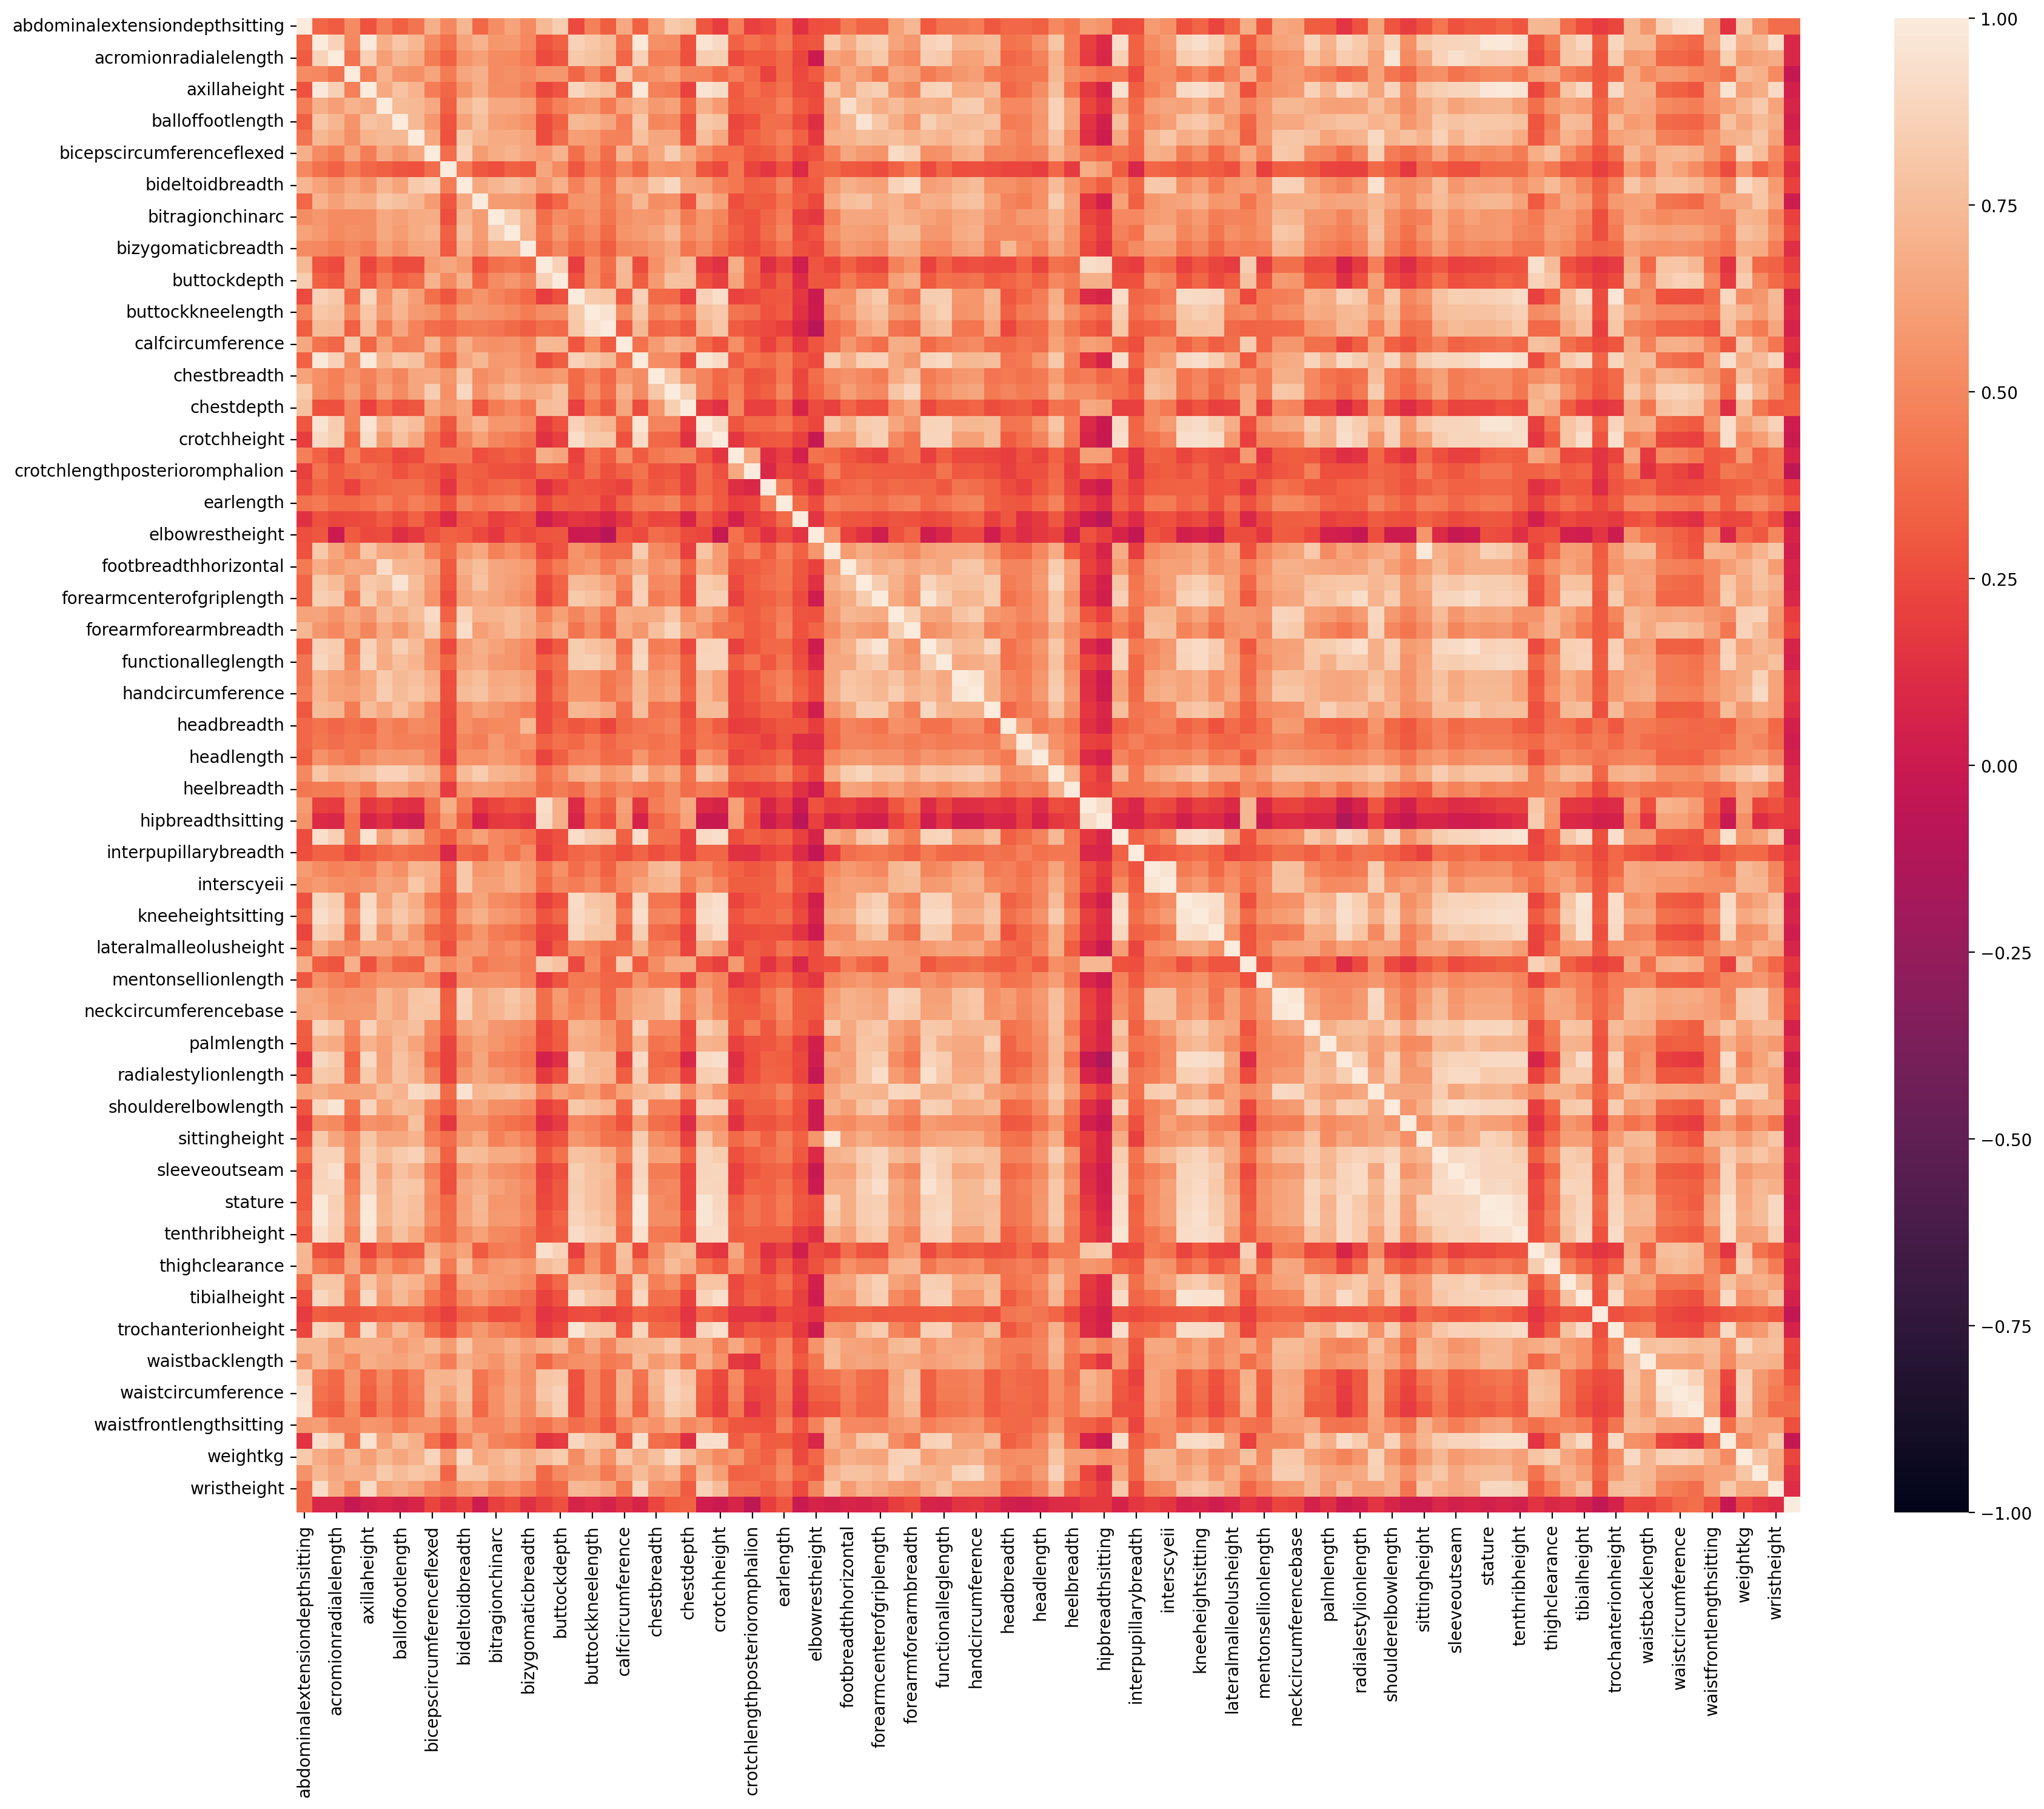

In [20]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(df_copy.corr(numeric_only=True), vmin=-1, vmax=1);

In [21]:
df_copy.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: float64(1), int64(93), object(4)
memory usage: 4.4+ MB


In [22]:
df_copy.shape

(5769, 98)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [23]:
# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [24]:
import sklearn

In [25]:
sklearn.__version__  # 1.3.1

'1.3.1'

In [26]:
# !conda install --upgrade sklearn #<--- If it doesn't work, try the one below

In [27]:
# !pip install --upgrade sklearn

In [131]:
df_copy.shape

(5769, 98)

In [132]:
# Split the data
X = df_copy.drop(["DODRace"], axis=1)
y = df_copy["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [133]:
y_train

5165    White
5393    White
5659    White
3628    White
2914    White
        ...  
5346    White
4192    White
887     White
3891    White
5015    White
Name: DODRace, Length: 4615, dtype: object

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [130]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [139]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[240   8  12]
 [  6  79  51]
 [  7  25 726]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.94       260
    Hispanic       0.71      0.58      0.64       136
       White       0.92      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.82      0.84      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 978    7   53]
 [  20  350  173]
 [  31   66 2937]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.95      1038
    Hispanic       0.83      0.64      0.72       543
       White       0.93      0.97      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.90      0.85      0.87      4615
weighted avg       0.92      0.92      0.92      4615



### Cross validation LR

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],



In [140]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)


f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}







In [141]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   0.301
score_time                 0.019
test_f1_hispanic           0.644
train_f1_hispanic          0.724
test_precision_hispanic    0.738
train_precision_hispanic   0.822
test_recall_hispanic       0.575
train_recall_hispanic      0.647
dtype: float64

### Logistic Model GridsearchCV

In [143]:
from sklearn.model_selection import GridSearchCV

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1, 10],  # 100, 1000
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
    "logistic__class_weight": ["balanced", None],
}

grid_search_LR = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2
)
grid_search_LR.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=saga; total time=   0.1s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=saga; total time=   0.1s
[CV] END logistic__C=0.001, logistic__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [144]:
grid_search_LR.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    solver='saga'))])

In [147]:
eval_metric_LR = eval_metric(grid_search_LR, X_train, y_train, X_test, y_test)
eval_metric_LR

Test_Set
[[238  13   9]
 [  6 109  21]
 [ 12  89 657]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.52      0.80      0.63       136
       White       0.96      0.87      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[ 969   34   35]
 [  22  450   71]
 [  64  351 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



## 2. SVC

### Vanilla SVC model

In [148]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [149]:
from sklearn.svm import SVC

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[229   1  30]
 [  5  52  79]
 [  6   9 743]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.92       260
    Hispanic       0.84      0.38      0.53       136
       White       0.87      0.98      0.92       758

    accuracy                           0.89      1154
   macro avg       0.89      0.75      0.79      1154
weighted avg       0.89      0.89      0.87      1154


Train_Set
[[ 949    4   85]
 [  23  263  257]
 [  11   15 3008]]
              precision    recall  f1-score   support

       Black       0.97      0.91      0.94      1038
    Hispanic       0.93      0.48      0.64       543
       White       0.90      0.99      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.93      0.80      0.84      4615
weighted avg       0.92      0.91      0.91      4615



### Cross validation SVM

In [174]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)


f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}







scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.566
train_f1_hispanic          0.637
test_precision_hispanic    0.893
train_precision_hispanic   0.936
test_recall_hispanic       0.416
train_recall_hispanic      0.483
dtype: float64

###  SVC Model GridsearchCV

In [175]:
param_grid = {'SVC__C': [0.001, 0.005, 0.01, 0.1, 1, 10],
               'SVC__gamma': ["scale", "auto", 0.2, 0.3],
               'SVC__kernel': ['rbf', 'linear',"poly", "sigmoid"],
               'SVC__class_weight': ["balanced"],  #Because the target is unbalanced
               'SVC__degree':[2,3,4]
             }

operations = [("encoder", column_trans), ("scaler", sc),
              ("SVC", SVC())]
SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(SVM_pipe_model,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=5,
                              return_train_score=True,
                              verbose=2)

In [176]:
SVM_pipe_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.005, 0.01, 0.1, 1, 10],
                         'SVC__class_weight': ['balanced'],
                         'SVC__degree': [2, 3, 4],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [177]:
SVM_pipe_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.001, class_weight='balanced', degree=2,
                     kernel='linear'))])

In [178]:
eval_metric_SVM= eval_metric(SVM_pipe_model_grid, X_train, y_train, X_test, y_test)
eval_metric_SVM

Test_Set
[[227  26   7]
 [ 11  96  29]
 [ 18 187 553]]
              precision    recall  f1-score   support

       Black       0.89      0.87      0.88       260
    Hispanic       0.31      0.71      0.43       136
       White       0.94      0.73      0.82       758

    accuracy                           0.76      1154
   macro avg       0.71      0.77      0.71      1154
weighted avg       0.85      0.76      0.79      1154


Train_Set
[[ 920   74   44]
 [  49  375  119]
 [  72  620 2342]]
              precision    recall  f1-score   support

       Black       0.88      0.89      0.89      1038
    Hispanic       0.35      0.69      0.47       543
       White       0.93      0.77      0.85      3034

    accuracy                           0.79      4615
   macro avg       0.72      0.78      0.73      4615
weighted avg       0.85      0.79      0.81      4615



## 3. RF

### Vanilla RF Model

In [161]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [162]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101, class_weight="balanced"))]  #since target is imbalanced

RF_pipe_model = Pipeline(steps=operations)

RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [164]:
eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[180   0  80]
 [ 10   2 124]
 [  7   0 751]]
              precision    recall  f1-score   support

       Black       0.91      0.69      0.79       260
    Hispanic       1.00      0.01      0.03       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.90      0.57      0.56      1154
weighted avg       0.84      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Cross Validation RF

In [165]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])


scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [166]:
scores = cross_validate(RF_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.072
train_f1_hispanic          1.000
test_precision_hispanic    0.692
train_precision_hispanic   1.000
test_recall_hispanic       0.039
train_recall_hispanic      1.000
dtype: float64

### RF Model GridsearchCV

In [167]:
# start with these, if the best result is on the edge, we may investigate more on that area

param_grid = {'RF_model__n_estimators':[50, 64, 128, 100, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.2, 0.5, 0.8, 1]
             }

In [169]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

RF_pipe_model_grid = GridSearchCV(estimator=RF_pipe_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [170]:
RF_pipe_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 64, 128, 100, 200]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [171]:
RF_pipe_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.8,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=101))])

In [172]:
RF_pipe_model_grid.best_score_

0.6371049949031601

In [173]:
eval_metric_RF = eval_metric(RF_pipe_model_grid, X_train, y_train, X_test, y_test)
eval_metric_RF

Test_Set
[[143  74  43]
 [  4  88  44]
 [ 45 315 398]]
              precision    recall  f1-score   support

       Black       0.74      0.55      0.63       260
    Hispanic       0.18      0.65      0.29       136
       White       0.82      0.53      0.64       758

    accuracy                           0.55      1154
   macro avg       0.58      0.57      0.52      1154
weighted avg       0.73      0.55      0.60      1154


Train_Set
[[ 578  290  170]
 [  38  348  157]
 [ 211 1099 1724]]
              precision    recall  f1-score   support

       Black       0.70      0.56      0.62      1038
    Hispanic       0.20      0.64      0.31       543
       White       0.84      0.57      0.68      3034

    accuracy                           0.57      4615
   macro avg       0.58      0.59      0.53      4615
weighted avg       0.73      0.57      0.62      4615



## 4. XGBoost

### Vanilla XGBoost Model

In [179]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [180]:
df_copy["SubjectsBirthLocation"].nunique()

136

In [181]:
import sklearn

In [182]:
sklearn.__version__  # 1.3.1

'1.3.1'

In [183]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans = column_trans.set_output(transform="pandas")

In [184]:
df_copy.shape

(5769, 98)

In [185]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
## XGBoost expects the target classes as integer numbers starting from 0


df_copy2 = df_copy.copy()
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black", 1: "Hispanic", 2: "White"})
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]


0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [186]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [187]:
# Split the data
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [188]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model_XGB = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model_XGB.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [189]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [190]:
eval_metric(pipe_model_XGB, X_train, y_train, X_test, y_test)

Test_Set
[[220   9  31]
 [  9  41  86]
 [ 14   5 739]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.87       260
           1       0.75      0.30      0.43       136
           2       0.86      0.97      0.92       758

    accuracy                           0.87      1154
   macro avg       0.84      0.71      0.74      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### CV XGBoost Model

In [191]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [192]:
from sklearn.model_selection import cross_val_score, cross_validate


scores = cross_validate(
    pipe_model_XGB, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   2.136
score_time                 0.024
test_f1_hispanic           0.440
train_f1_hispanic          1.000
test_precision_hispanic    0.723
train_precision_hispanic   1.000
test_recall_hispanic       0.317
train_recall_hispanic      1.000
dtype: float64

### XGBoost Model GridsearchCV

#### GridSearch

In [ ]:

# # param_grid = {"xgboost__n_estimators":[50, 100, 200],
# #               'xgboost__max_depth':[3,4,5],
# #               "xgboost__learning_rate": [0.1, 0.2],
# #               "xgboost__subsample":[0.5, 0.8, 1],
# #               "xgboost__colsample_bytree":[0.5,0.7, 1],
# #              "xgboost__reg_alpha": [0, 0.25, 0.5, 0.75, 1],
# # }

# param_grid = {"xgboost__n_estimators":[50, 100],
#               'xgboost__max_depth':[3,4],
#               "xgboost__learning_rate": [0.1, 0.2],
#               "xgboost__subsample":[0.5, 0.8, 1],
#               "xgboost__colsample_bytree":[0.5,0.7, 1],
#              "xgboost__reg_alpha": [0, 0.25, 0.5],
# }



In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score, cross_validate


# # Create a pipeline
# pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])


# param_grid = param_grid

# grid_search = GridSearchCV(
#     pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, )
# grid_search.fit(X_train, y_train)

In [ ]:
# grid_search.best_estimator_

In [ ]:
# pd.DataFrame(grid_search.cv_results_).loc[
#     grid_search.best_index_, ["mean_test_score", "mean_train_score"]
# ]

In [ ]:
# eval_metric(grid_search, X_train, y_train, X_test, y_test)

#### Random Serach XGBoost Recall

In [203]:
############ Random Search

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Define the hyperparameter space
# param_grid = {
#     "xgboost__n_estimators": randint(30, 201),      # Integer
#     "xgboost__max_depth": randint(3, 11),           # Integer
#     "xgboost__learning_rate": uniform(0.001, 3),    # float
#     "xgboost__subsample": uniform(0.5, 1),          # float
#     "xgboost__colsample_bytree": uniform(0.5, 1),   # float
#     "xgboost__reg_alpha": uniform(0, 1),            # float
#     "xgboost__gamma": uniform(0, 11),               # float
# }

param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.05),    # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
    "xgboost__colsample_bytree": np.arange(0.3, 1, step=0.05),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float
}



# Create the random search object
random_search_XGB = RandomizedSearchCV(
    estimator=pipe_model_XGB,
    param_distributions=param_grid,
    n_iter=750,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

# Fit the random search model
random_search_XGB.fit(X_train, y_train)



Fitting 5 folds for each of 750 candidates, totalling 3750 fits
[CV] END xgboost__colsample_bytree=0.8499999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.6510000000000002, xgboost__max_depth=4, xgboost__n_estimators=68, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.8499999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.6510000000000002, xgboost__max_depth=4, xgboost__n_estimators=68, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.8499999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.6510000000000002, xgboost__max_depth=4, xgboost__n_estimators=68, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.8499999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.6510000000000002, xgboost__max_depth=4, xgboost__n_estimators=68, xgboost__reg_alpha=0.4, xg

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=No...
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'xgboost__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgboost__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True,
                   scoring=make_scorer(recall_score, average=None, labels=[1]),
                   verbose=2)

In [204]:
# Print the best hyperparameters
print(random_search_XGB.best_params_)

{'xgboost__subsample': 0.7, 'xgboost__reg_alpha': 0.0, 'xgboost__n_estimators': 4, 'xgboost__max_depth': 3, 'xgboost__learning_rate': 2.751, 'xgboost__gamma': 5.5, 'xgboost__colsample_bytree': 0.8499999999999999}


In [205]:
eval_metric_XGB= eval_metric(random_search_XGB, X_train, y_train, X_test, y_test)
eval_metric_XGB

Test_Set
[[ 18 217  25]
 [  3 122  11]
 [ 15 664  79]]
              precision    recall  f1-score   support

           0       0.50      0.07      0.12       260
           1       0.12      0.90      0.21       136
           2       0.69      0.10      0.18       758

    accuracy                           0.19      1154
   macro avg       0.44      0.36      0.17      1154
weighted avg       0.58      0.19      0.17      1154


Train_Set
[[ 105  838   95]
 [  29  468   46]
 [  59 2694  281]]
              precision    recall  f1-score   support

           0       0.54      0.10      0.17      1038
           1       0.12      0.86      0.21       543
           2       0.67      0.09      0.16      3034

    accuracy                           0.19      4615
   macro avg       0.44      0.35      0.18      4615
weighted avg       0.57      0.19      0.17      4615



#### Random Serach XGBoost F1

Let's try this time by using F1 Score

In [207]:
############ Random Search

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Define the hyperparameter space
# param_grid = {
#     "xgboost__n_estimators": randint(30, 201),      # Integer
#     "xgboost__max_depth": randint(3, 11),           # Integer
#     "xgboost__learning_rate": uniform(0.001, 3),    # float
#     "xgboost__subsample": uniform(0.5, 1),          # float
#     "xgboost__colsample_bytree": uniform(0.5, 1),   # float
#     "xgboost__reg_alpha": uniform(0, 1),            # float
#     "xgboost__gamma": uniform(0, 11),               # float
# }

param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.05),    # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
    "xgboost__colsample_bytree": np.arange(0.3, 1, step=0.05),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float
}



# Create the random search object
random_search_XGB_F1 = RandomizedSearchCV(
    estimator=pipe_model_XGB,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=f1_hispanic
)

# Fit the random search model
random_search_XGB_F1.fit(X_train, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END xgboost__colsample_bytree=0.7499999999999999, xgboost__gamma=9.0, xgboost__learning_rate=2.451, xgboost__max_depth=10, xgboost__n_estimators=46, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.7499999999999999, xgboost__gamma=9.0, xgboost__learning_rate=2.451, xgboost__max_depth=10, xgboost__n_estimators=46, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.7499999999999999, xgboost__gamma=9.0, xgboost__learning_rate=2.451, xgboost__max_depth=10, xgboost__n_estimators=46, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.7499999999999999, xgboost__gamma=9.0, xgboost__learning_rate=2.451, xgboost__max_depth=10, xgboost__n_estimators=46, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.7499999999999999

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=No...
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'xgboost__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgboost__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True,
                   scoring=make_scorer(f1_score, average=None, labels=[1]),
                   verbose=2)

In [208]:
# Print the best hyperparameters
print(random_search_XGB_F1.best_params_)

{'xgboost__subsample': 0.8999999999999999, 'xgboost__reg_alpha': 0.0, 'xgboost__n_estimators': 78, 'xgboost__max_depth': 6, 'xgboost__learning_rate': 0.8510000000000001, 'xgboost__gamma': 5.5, 'xgboost__colsample_bytree': 0.7999999999999998}


In [210]:
eval_metric_SVM_F1= eval_metric(random_search_XGB_F1, X_train, y_train, X_test, y_test)
eval_metric_SVM_F1

Test_Set
[[209   6  45]
 [  9  49  78]
 [ 21  10 727]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       260
           1       0.75      0.36      0.49       136
           2       0.86      0.96      0.90       758

    accuracy                           0.85      1154
   macro avg       0.83      0.71      0.74      1154
weighted avg       0.85      0.85      0.84      1154


Train_Set
[[ 972    4   62]
 [  16  367  160]
 [  17   18 2999]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1038
           1       0.94      0.68      0.79       543
           2       0.93      0.99      0.96      3034

    accuracy                           0.94      4615
   macro avg       0.95      0.87      0.90      4615
weighted avg       0.94      0.94      0.94      4615



---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
#!pip install imblearn

In [28]:
# Using the ClusterCentroids to balance the target column in training data
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

We will try over-sampling along with just partial features that were used by looking into the boxplots feature by feature where we ignore the feature with less variability between the classes

<Axes: xlabel='DODRace', ylabel='acromialheight'>

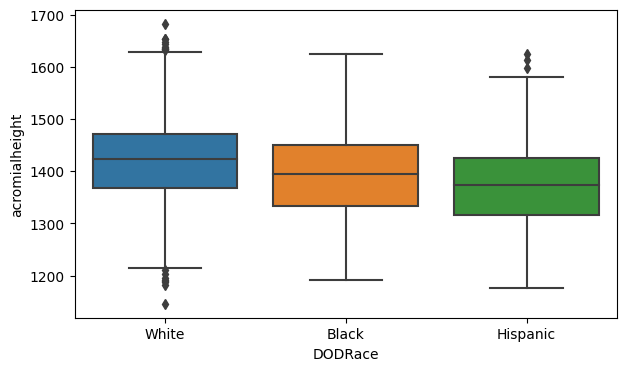

In [230]:
for feature in df_copy.describe().columns.to_list():
    sns.boxplot(y=df_copy[feature], x=df_copy["DODRace"])

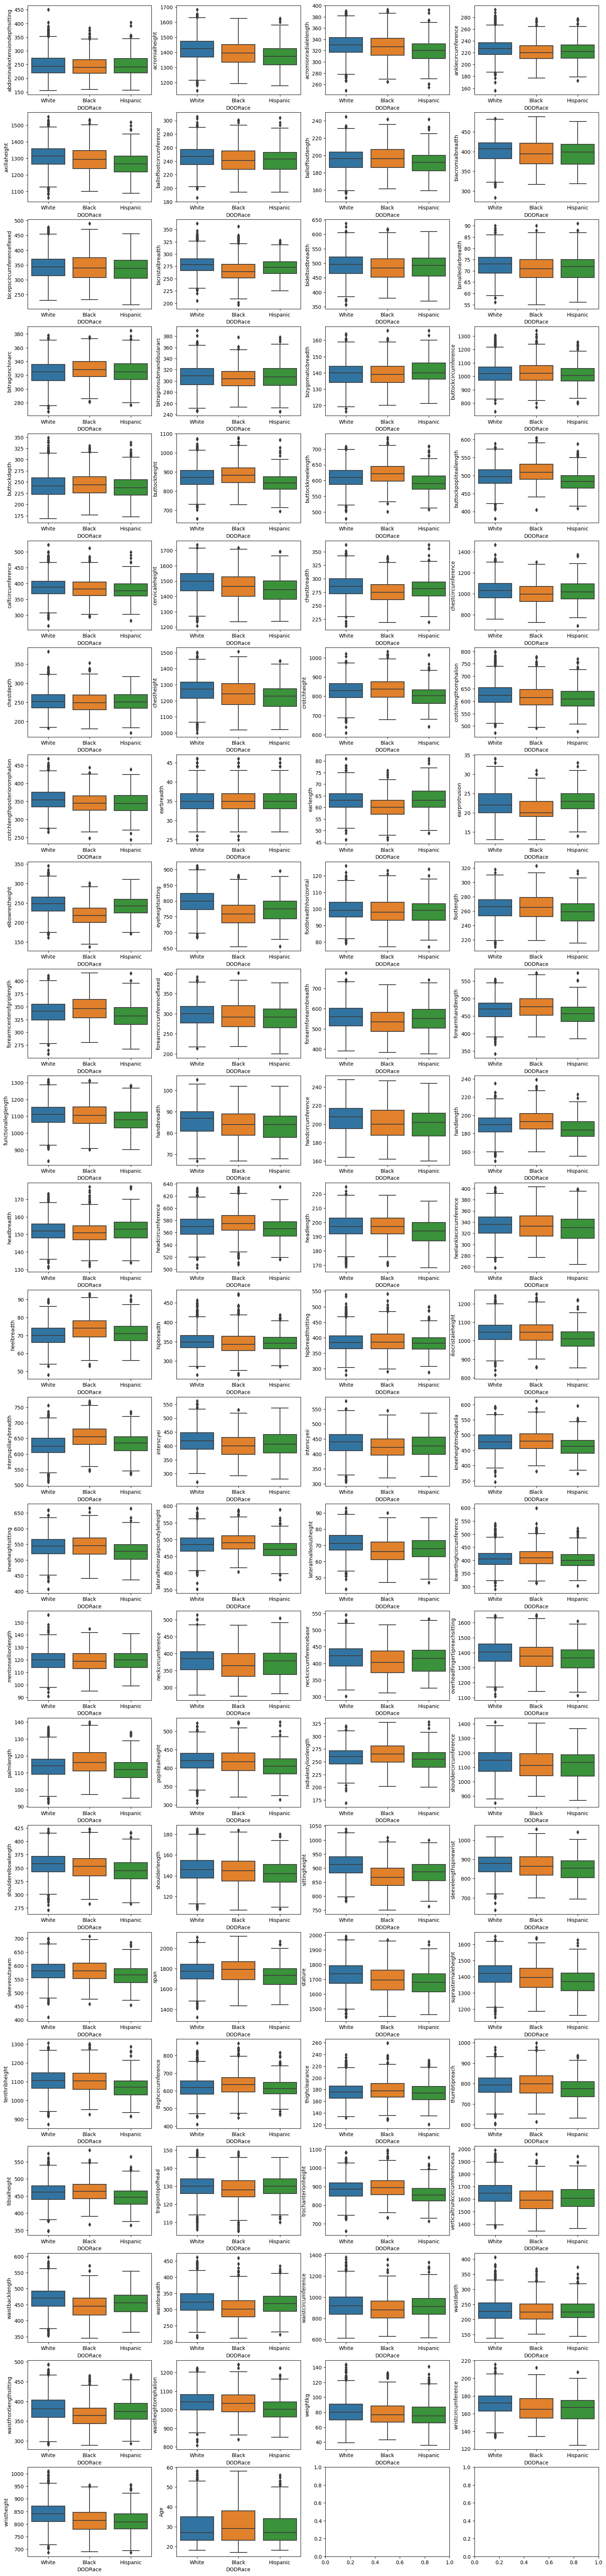

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(df_copy.describe().columns.to_list())//4 + 1, 4, figsize=(20, 90))
for i, feature in enumerate(df_copy.describe().columns.to_list()):
    sns.boxplot(y=df_copy[feature], x=df_copy["DODRace"], ax=axs[i//4][i%4])
plt.show()


In [30]:
# These features chosen one by one after looking in the box plots of each feature along with the distribution in each of the three classes


columns_to_keep = ['acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength',
                   'biacromialbreadth', 'bitragionchinarc', 'bizygomaticbreadth', 'buttockheight',
                   'buttockkneelength', 'buttockpopliteallength', 'cervicaleheight', 'chestbreadth',
                   'chestheight', 'crotchheight', 'earlength', 'earprotrusion', 'elbowrestheight',
                   'eyeheightsitting', 'forearmcenterofgriplength', 'forearmforearmbreadth',
                   'forearmhandlength', 'handbreadth', 'handlength', 'headbreadth', 'headcircumference',
                   'headlength', 'heelbreadth', 'iliocristaleheight', 'interscyei', 'interscyeii',
                   'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight',
                   'lateralmalleolusheight', 'neckcircumference', 'neckcircumferencebase',
                   'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
                   'shoulderelbowlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span',
                   'stature', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance',
                   'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight',
                   'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference',
                   'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight',
                   'SubjectsBirthLocation', 'Age', 'Gender', 'WritingPreference', 'DODRace']

df_partial = df_copy[columns_to_keep]

In [31]:
df_partial.shape

(5769, 67)

We reuce number of features to **66**

In [279]:
df_partial.head()

acromialheight  acromionradialelength  axillaheight  balloffootlength  \
0            1467                    337          1347               202   
1            1395                    326          1293               193   
2            1430                    341          1327               196   
3            1347                    310          1239               199   
4            1585                    372          1478               224   

   biacromialbreadth  bitragionchinarc  bizygomaticbreadth  buttockheight  \
0                401               319                 142            882   
1                394               344                 135            870   
2                427               345                 135            901   
3                401               328                 143            821   
4                435               340                 138           1080   

   buttockkneelength  buttockpopliteallength  cervicaleheight  chestbreadth  \
0                619                     509             1535           291   
1                584                     468             1471           269   
2                623                     506             1501           288   
3                560                     437             1423           296   
4                706                     567             1684           304   

   chestheight  crotchheight  earlength  ...  tragiontopofhead  \
0         1292           877         71  ...               140   
1         1244           851         62  ...               120   
2         1288           854         61  ...               125   
3         1205           769         66  ...               127   
4         1452          1014         56  ...               122   

   trochanterionheight  verticaltrunkcircumferenceusa  waistbacklength  \
0                  919                           1700              501   
1                  918                           1627              432   
2                  918                           1678              472   
3                  847                           1625              461   
4                 1090                           1679              467   

   waistbreadth  waistcircumference  waistfrontlengthsitting  \
0           329                 933                      440   
1           316                 870                      371   
2           329                 964                      411   
3           315                 857                      399   
4           303                 868                      379   

   waistheightomphalion  wristcircumference  wristheight  \
0                  1054                 175          853   
1                  1054                 167          815   
2                  1041                 180          831   
3                   968                 176          793   
4                  1245                 188          954   

   SubjectsBirthLocation  Age  Gender  WritingPreference  DODRace  
0           North Dakota   41    Male         Right hand    White  
1               New York   35    Male          Left hand    White  
2               New York   42    Male          Left hand    Black  
3              Wisconsin   31    Male         Right hand    White  
4         North Carolina   21    Male         Right hand    Black  

[5 rows x 67 columns]

In [280]:
display(df_partial.describe())
print("Number of nulls",df_partial.isnull().sum().sum())

acromialheight  acromionradialelength  axillaheight  balloffootlength  \
count        5769.000               5769.000      5769.000          5769.000   
mean         1408.630                328.072      1301.903           195.119   
std            78.303                 20.445        71.261            13.379   
min          1146.000                249.000      1062.000           151.000   
25%          1353.000                314.000      1252.000           186.000   
50%          1412.000                328.000      1304.000           196.000   
75%          1464.000                342.000      1351.000           205.000   
max          1683.000                393.000      1553.000           245.000   

       biacromialbreadth  bitragionchinarc  bizygomaticbreadth  buttockheight  \
count           5769.000          5769.000            5769.000       5769.000   
mean             399.706           324.962             139.529        872.113   
std               30.124            17.050               7.249         54.065   
min              283.000           267.000             116.000        656.000   
25%              377.000           314.000             134.000        834.000   
50%              404.000           326.000             140.000        870.000   
75%              422.000           336.000             145.000        908.000   
max              489.000           385.000             166.000       1080.000   

       buttockkneelength  buttockpopliteallength  cervicaleheight  \
count           5769.000                5769.000         5769.000   
mean             610.450                 498.332         1479.952   
std               33.121                  28.513           83.591   
min              479.000                 380.000         1208.000   
25%              587.000                 478.000         1421.000   
50%              610.000                 498.000         1487.000   
75%              633.000                 518.000         1539.000   
max              736.000                 605.000         1738.000   

       chestbreadth  chestheight  crotchheight  earlength  ...  \
count      5769.000     5769.000      5769.000   5769.000  ...   
mean        283.233     1254.290       827.106     62.606  ...   
std          20.612       78.882        54.056      4.862  ...   
min         213.000     1000.000       610.000     46.000  ...   
25%         269.000     1199.000       789.000     59.000  ...   
50%         283.000     1261.000       827.000     62.000  ...   
75%         297.000     1310.000       864.000     66.000  ...   
max         363.000     1506.000      1031.000     81.000  ...   

       thighcircumference  thighclearance  thumbtipreach  tibialheight  \
count            5769.000        5769.000       5769.000      5769.000   
mean              623.584         176.696        791.045       459.389   
std                57.530          16.124         53.487        29.275   
min               412.000         121.000        602.000       347.000   
25%               585.000         166.000        754.000       439.000   
50%               622.000         176.000        793.000       459.000   
75%               661.000         187.000        828.000       479.000   
max               870.000         259.000        998.000       584.000   

       tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  \
count          5769.000             5769.000                       5769.000   
mean            129.580              884.659                       1632.471   
std               6.636               53.766                         98.204   
min             105.000              660.000                       1342.000   
25%             125.000              847.000                       1561.000   
50%             130.000              883.000                       1631.000   
75%             134.000              920.000                       1697.000   
max             150.000             1095

Number of nulls 0


In [29]:
# Split the data
X_partial = df_partial.drop(["DODRace"], axis=1)
y_partial = df_partial["DODRace"]

from sklearn.model_selection import train_test_split

X_train_partial, X_test_partial, y_train_partial, y_test_partial = train_test_split(
    X_partial, y_partial, test_size=0.20, random_state=42, stratify=y_partial
)

In [31]:
# check them
y_test_partial

869        Black
3355       White
5947       White
2302    Hispanic
972        White
          ...   
596        White
609        White
5997       Black
5590       White
3904       White
Name: DODRace, Length: 1154, dtype: object

## **Remember that while SMOTE can be helpful in many situations, it's not a one-size-fits-all solution, and its effectiveness can vary depending on the specific problem and dataset. It's important to carefully evaluate the performance of your model after using SMOTE and consider other techniques such as adjusting class weights or using different sampling strategies if necessary.**

### Logistic Oversampling - partial features (Vanilla)

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans = column_trans.set_output(transform="pandas")

In [36]:
#Using SMOTE to over sampling the data

X_train_encoded = column_trans.fit_transform(X_train_partial)
X_test_encoded = column_trans.transform(X_test_partial) # We shouldn't apply fit_transform to the TEST data.

# Apply SMOTE to the training data only
smote = SMOTE(sampling_strategy='auto', random_state=101)
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_train_encoded, y_train_partial)

print(sorted(Counter(y_resampled_Over).items()))

[('Black', 3034), ('Hispanic', 3034), ('White', 3034)]


In [287]:
y_resampled_Over

0          White
1          White
2          White
3          White
4          White
          ...   
9097    Hispanic
9098    Hispanic
9099    Hispanic
9100    Hispanic
9101    Hispanic
Name: DODRace, Length: 9102, dtype: object

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

lr = LogisticRegression( class_weight="balanced")

operations = [("scaler", sc), ("logistic", lr)]


pipe_model_LR_PF = Pipeline(steps=operations)

pipe_model_LR_PF.fit(X_resampled_Over, y_resampled_Over)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [291]:
eval_metric(pipe_model_LR_PF, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)

Test_Set
[[227  16  17]
 [  7  98  31]
 [ 16  79 663]]
              precision    recall  f1-score   support

       Black       0.91      0.87      0.89       260
    Hispanic       0.51      0.72      0.60       136
       White       0.93      0.87      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.82      0.80      1154
weighted avg       0.88      0.86      0.86      1154


Train_Set
[[2909   58   67]
 [  59 2625  350]
 [  66  325 2643]]
              precision    recall  f1-score   support

       Black       0.96      0.96      0.96      3034
    Hispanic       0.87      0.87      0.87      3034
       White       0.86      0.87      0.87      3034

    accuracy                           0.90      9102
   macro avg       0.90      0.90      0.90      9102
weighted avg       0.90      0.90      0.90      9102



### Logistic Oversampling - partial features (CV)

In [293]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)


f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [294]:
from sklearn.model_selection import cross_val_score, cross_validate


scores = cross_validate(
    pipe_model_LR_PF, X_resampled_Over, y_resampled_Over, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   0.527
score_time                 0.025
test_f1_hispanic           0.855
train_f1_hispanic          0.868
test_precision_hispanic    0.859
train_precision_hispanic   0.872
test_recall_hispanic       0.852
train_recall_hispanic      0.865
dtype: float64

### Logistic Oversampling - partial features (GridSearch)

In [299]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1, 10], 
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
    "logistic__class_weight": ["balanced", None],
}

grid_search_LR_PF = GridSearchCV(
    pipe_model_LR_PF, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2
)
grid_search_LR_PF.fit( X_resampled_Over, y_resampled_Over)
grid_search_LR_PF.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.1s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.1s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.1s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear; total time=   0.1s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=saga; total time=   1.5s
[CV] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=saga; total time=   1.2s
[CV] END logistic__C=0.001, logistic__

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                                    solver='saga'))])

In [300]:
eval_metric_LR_PF = eval_metric(pipe_model_LR_PF, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)
eval_metric_LR_PF

Test_Set
[[227  16  17]
 [  7  98  31]
 [ 16  79 663]]
              precision    recall  f1-score   support

       Black       0.91      0.87      0.89       260
    Hispanic       0.51      0.72      0.60       136
       White       0.93      0.87      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.82      0.80      1154
weighted avg       0.88      0.86      0.86      1154


Train_Set
[[2909   58   67]
 [  59 2625  350]
 [  66  325 2643]]
              precision    recall  f1-score   support

       Black       0.96      0.96      0.96      3034
    Hispanic       0.87      0.87      0.87      3034
       White       0.86      0.87      0.87      3034

    accuracy                           0.90      9102
   macro avg       0.90      0.90      0.90      9102
weighted avg       0.90      0.90      0.90      9102



### SVM Oversampling - partial features (Vanilla)

In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


operations = [("scaler", sc), ("SVC", SVC())]


pipe_model_SVM_PF = Pipeline(steps=operations)

pipe_model_SVM_PF.fit(X_resampled_Over, y_resampled_Over)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC())])

In [309]:
eval_metric(pipe_model_SVM_PF, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)

Test_Set
[[222  12  26]
 [  7  89  40]
 [ 13  66 679]]
              precision    recall  f1-score   support

       Black       0.92      0.85      0.88       260
    Hispanic       0.53      0.65      0.59       136
       White       0.91      0.90      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.80      0.79      1154
weighted avg       0.87      0.86      0.86      1154


Train_Set
[[2916   50   68]
 [  48 2814  172]
 [  44  239 2751]]
              precision    recall  f1-score   support

       Black       0.97      0.96      0.97      3034
    Hispanic       0.91      0.93      0.92      3034
       White       0.92      0.91      0.91      3034

    accuracy                           0.93      9102
   macro avg       0.93      0.93      0.93      9102
weighted avg       0.93      0.93      0.93      9102



### SVM Oversampling - partial features (CV)

In [310]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)


f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

from sklearn.model_selection import cross_val_score, cross_validate


scores = cross_validate(
    pipe_model_SVM_PF, X_resampled_Over, y_resampled_Over, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   2.981
score_time                 0.609
test_f1_hispanic           0.894
train_f1_hispanic          0.915
test_precision_hispanic    0.885
train_precision_hispanic   0.905
test_recall_hispanic       0.905
train_recall_hispanic      0.925
dtype: float64

### SVM Oversampling - partial features (GridSearch)

In [321]:
param_grid = {'SVC__C': [0.001, 0.005, 0.01, 0.1, 1, 10],
               'SVC__gamma': ["scale", "auto", 0.2, 0.3],
               'SVC__kernel': ['rbf', 'linear',"poly", "sigmoid"],
               'SVC__class_weight': ["balanced"],
               'SVC__degree':[2,3,4]
             }


SVM_pipe_model_grid_PF = GridSearchCV(pipe_model_SVM_PF,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=5,
                              return_train_score=True,
                              verbose=2)

In [322]:
SVM_pipe_model_grid_PF.fit(X_resampled_Over, y_resampled_Over)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.005, 0.01, 0.1, 1, 10],
                         'SVC__class_weight': ['balanced'],
                         'SVC__degree': [2, 3, 4],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [323]:
SVM_pipe_model_grid_PF.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.001, class_weight='balanced', degree=2,
                     kernel='poly'))])

In [324]:
eval_metric_SVM_PF = eval_metric(SVM_pipe_model_grid_PF, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)
eval_metric_SVM_PF

Test_Set
[[  7 253   0]
 [  0 136   0]
 [  2 738  18]]
              precision    recall  f1-score   support

       Black       0.78      0.03      0.05       260
    Hispanic       0.12      1.00      0.22       136
       White       1.00      0.02      0.05       758

    accuracy                           0.14      1154
   macro avg       0.63      0.35      0.10      1154
weighted avg       0.85      0.14      0.07      1154


Train_Set
[[  48 2986    0]
 [   0 3034    0]
 [   1 2981   52]]
              precision    recall  f1-score   support

       Black       0.98      0.02      0.03      3034
    Hispanic       0.34      1.00      0.50      3034
       White       1.00      0.02      0.03      3034

    accuracy                           0.34      9102
   macro avg       0.77      0.34      0.19      9102
weighted avg       0.77      0.34      0.19      9102



It seems the bad result because during the training it focuses too much about Hispanic recall

### SVM Oversampling - partial features (Vanilla) Accuracy

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

sc = StandardScaler()


operations = [("scaler", sc), ("SVC", SVC())]


pipe_model_SVM_PF = Pipeline(steps=operations)

pipe_model_SVM_PF.fit(X_resampled_Over, y_resampled_Over)

eval_metric(pipe_model_SVM_PF, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)

Test_Set
[[222  12  26]
 [  7  89  40]
 [ 13  66 679]]
              precision    recall  f1-score   support

       Black       0.92      0.85      0.88       260
    Hispanic       0.53      0.65      0.59       136
       White       0.91      0.90      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.80      0.79      1154
weighted avg       0.87      0.86      0.86      1154


Train_Set
[[2916   50   68]
 [  48 2814  172]
 [  44  239 2751]]
              precision    recall  f1-score   support

       Black       0.97      0.96      0.97      3034
    Hispanic       0.91      0.93      0.92      3034
       White       0.92      0.91      0.91      3034

    accuracy                           0.93      9102
   macro avg       0.93      0.93      0.93      9102
weighted avg       0.93      0.93      0.93      9102



### SVM Oversampling - partial features (CV) Accuracy

In [42]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)


# f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
# precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
# recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])
# scoring = {"f1_hispanic":f1_hispanic,
#            "precision_hispanic":precision_hispanic,
#            "recall_hispanic":recall_hispanic}

from sklearn.model_selection import cross_val_score, cross_validate


scores = cross_validate(
    pipe_model_SVM_PF, X_resampled_Over, y_resampled_Over, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time      9.624
score_time    1.836
test_score    0.908
train_score   0.930
dtype: float64

### SVM Oversampling - partial features (GridSearch) Accuracy

In [49]:
param_grid = {'SVC__C': [0.001, 0.01, 0.1, 1, 10],
               'SVC__gamma': ["scale", "auto"],
               'SVC__kernel': ['rbf', 'linear',"poly", "sigmoid"],
               'SVC__class_weight': ["balanced"],
               'SVC__degree':[2,3]
             }

from sklearn.model_selection import GridSearchCV
SVM_pipe_model_grid_PF_Acc = GridSearchCV(pipe_model_SVM_PF,
                              param_grid,
                              n_jobs=-1,
                              cv=5,
                              return_train_score=True,
                              verbose=2)

In [50]:
SVM_pipe_model_grid_PF_Acc.fit(X_resampled_Over, y_resampled_Over)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.01, 0.1, 1, 10],
                         'SVC__class_weight': ['balanced'],
                         'SVC__degree': [2, 3], 'SVC__gamma': ['scale', 'auto'],
                         'SVC__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             return_train_score=True, verbose=2)

In [51]:
SVM_pipe_model_grid_PF_Acc.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=10, class_weight='balanced', degree=2))])

In [52]:
eval_metric_SVM_PF = eval_metric(SVM_pipe_model_grid_PF_Acc, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)
eval_metric_SVM_PF

Test_Set
[[222   8  30]
 [  9  83  44]
 [ 16  47 695]]
              precision    recall  f1-score   support

       Black       0.90      0.85      0.88       260
    Hispanic       0.60      0.61      0.61       136
       White       0.90      0.92      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.79      0.80      1154
weighted avg       0.87      0.87      0.87      1154


Train_Set
[[3014    9   11]
 [   4 2999   31]
 [  10   64 2960]]
              precision    recall  f1-score   support

       Black       1.00      0.99      0.99      3034
    Hispanic       0.98      0.99      0.98      3034
       White       0.99      0.98      0.98      3034

    accuracy                           0.99      9102
   macro avg       0.99      0.99      0.99      9102
weighted avg       0.99      0.99      0.99      9102



### RF Oversampling - partial features (Vanilla)

In [325]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [326]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

In [327]:
#Using SMOTE to over sampling the data

X_train_encoded = column_trans.fit_transform(X_train_partial)
X_test_encoded = column_trans.transform(X_test_partial) # We shouldn't apply fit_transform to the TEST data.

# Apply SMOTE to the training data only
smote = SMOTE(sampling_strategy='auto', random_state=101)
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_train_encoded, y_train_partial)

print(sorted(Counter(y_resampled_Over).items()))

[('Black', 3034), ('Hispanic', 3034), ('White', 3034)]


In [328]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("scaler", sc),
              ("RF_model", RandomForestClassifier(random_state=101, class_weight="balanced"))]  #since target is imbalanced

RF_pipe_model_PF = Pipeline(steps=operations)

RF_pipe_model_PF.fit(X_resampled_Over, y_resampled_Over )

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [329]:
eval_metric(RF_pipe_model_PF, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)

Test_Set
[[205   9  46]
 [ 18  48  70]
 [ 38  49 671]]
              precision    recall  f1-score   support

       Black       0.79      0.79      0.79       260
    Hispanic       0.45      0.35      0.40       136
       White       0.85      0.89      0.87       758

    accuracy                           0.80      1154
   macro avg       0.70      0.68      0.68      1154
weighted avg       0.79      0.80      0.79      1154


Train_Set
[[3034    0    0]
 [   0 3034    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      3034
    Hispanic       1.00      1.00      1.00      3034
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      9102
   macro avg       1.00      1.00      1.00      9102
weighted avg       1.00      1.00      1.00      9102



### RF Oversampling - partial features (CV)

In [330]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)


f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

from sklearn.model_selection import cross_val_score, cross_validate


scores = cross_validate(
    RF_pipe_model_PF, X_resampled_Over, y_resampled_Over, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   13.472
score_time                  0.045
test_f1_hispanic            0.939
train_f1_hispanic           1.000
test_precision_hispanic     0.923
train_precision_hispanic    1.000
test_recall_hispanic        0.956
train_recall_hispanic       1.000
dtype: float64

### RF Oversampling - partial features (GridSearch)

In [336]:
# start with these, if the best result is on the edge, we may investigate more on that area

param_grid = {'RF_model__n_estimators':[50, 128, 100, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.2, 0.5, 0.8, 1]
             }

In [337]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

RF_pipe_model_grid_PF = GridSearchCV(estimator=RF_pipe_model_PF,
                             param_grid = param_grid,
                             #scoring=recall_hispanic, since now our dataset is balanced
                             n_jobs = -1,
                             verbose=2)
RF_pipe_model_grid_PF.fit(X_resampled_Over, y_resampled_Over )

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.2, 0.5, 0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 128, 100, 200]},
             verbose=2)

In [338]:
RF_pipe_model_grid_PF.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        max_samples=0.5, min_samples_leaf=3,
                                        random_state=101))])

In [339]:
eval_metric_RF_PF = eval_metric(RF_pipe_model_grid_PF, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)
eval_metric_RF_PF

Test_Set
[[202  39  19]
 [ 21  82  33]
 [ 86 263 409]]
              precision    recall  f1-score   support

       Black       0.65      0.78      0.71       260
    Hispanic       0.21      0.60      0.32       136
       White       0.89      0.54      0.67       758

    accuracy                           0.60      1154
   macro avg       0.58      0.64      0.57      1154
weighted avg       0.76      0.60      0.64      1154


Train_Set
[[2479  374  181]
 [ 267 2245  522]
 [ 295  911 1828]]
              precision    recall  f1-score   support

       Black       0.82      0.82      0.82      3034
    Hispanic       0.64      0.74      0.68      3034
       White       0.72      0.60      0.66      3034

    accuracy                           0.72      9102
   macro avg       0.72      0.72      0.72      9102
weighted avg       0.72      0.72      0.72      9102



### XGBoost Oversampling - partial features (Vanilla)

In [347]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [348]:
import sklearn

In [349]:
sklearn.__version__  # 1.3.1

'1.3.1'

In [350]:
df_copy.shape

(5769, 98)

In [351]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
## XGBoost expects the target classes as integer numbers starting from 0

   
df_copy2 = df_copy.copy()
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black",               1: "Hispanic",           2: "White"})
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]


0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [352]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [353]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans = column_trans.set_output(transform="pandas")

In [354]:
# Split the data
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]

from sklearn.model_selection import train_test_split

X_train_partial, X_test_partial, y_train_partial, y_test_partial = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [355]:
#Using SMOTE to over sampling the data

X_train_encoded = column_trans.fit_transform(X_train_partial)
X_test_encoded = column_trans.transform(X_test_partial) # We shouldn't apply fit_transform to the TEST data.

# Apply SMOTE to the training data only
smote = SMOTE(sampling_strategy='auto', random_state=101)
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_train_encoded, y_train_partial)

print(sorted(Counter(y_resampled_Over).items()))

[(0, 3034), (1, 3034), (2, 3034)]


In [356]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
pipe_model_XGB_PF = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])
pipe_model_XGB_PF.fit(X_resampled_Over, y_resampled_Over )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [357]:
eval_metric(pipe_model_XGB_PF, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)

Test_Set
[[227  12  21]
 [ 11  59  66]
 [  8  33 717]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       260
           1       0.57      0.43      0.49       136
           2       0.89      0.95      0.92       758

    accuracy                           0.87      1154
   macro avg       0.79      0.75      0.77      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   0 3034    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      9102
   macro avg       1.00      1.00      1.00      9102
weighted avg       1.00      1.00      1.00      9102



### XGBoost Oversampling - partial features (CV)

In [360]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)


f1_hispanic = make_scorer(f1_score, average=None, labels =[1])
precision_hispanic = make_scorer(precision_score, average=None, labels =[1])
recall_hispanic = make_scorer(recall_score,  average=None, labels =[1])
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

from sklearn.model_selection import cross_val_score, cross_validate


scores = cross_validate(
    pipe_model_XGB_PF, X_resampled_Over, y_resampled_Over, scoring = scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   4.241
score_time                 0.026
test_f1_hispanic           0.795
train_f1_hispanic          1.000
test_precision_hispanic    0.928
train_precision_hispanic   1.000
test_recall_hispanic       0.698
train_recall_hispanic      1.000
dtype: float64

### XGBoost Oversampling - partial features (RandomEarch)

In [361]:
############ Random Search

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np


param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),            # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.05),      # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),              # float
    "xgboost__colsample_bytree": np.arange(0.3, 1, step=0.05),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float
}



# Create the random search object
random_search_XGB_PF = RandomizedSearchCV(
    estimator=pipe_model_XGB_PF,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    scoring= 
    return_train_score=True,
)

# Fit the random search model
random_search_XGB_PF.fit(X_resampled_Over, y_resampled_Over )


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.451, xgboost__max_depth=6, xgboost__n_estimators=82, xgboost__reg_alpha=0.8, xgboost__subsample=0.5; total time=   3.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.451, xgboost__max_depth=6, xgboost__n_estimators=82, xgboost__reg_alpha=0.8, xgboost__subsample=0.5; total time=   3.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.451, xgboost__max_depth=6, xgboost__n_estimators=82, xgboost__reg_alpha=0.8, xgboost__subsample=0.5; total time=   3.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.451, xgboost__max_depth=6, xgboost__n_estimators=82, xgboost__reg_alpha=0.8, xgboost__subsample=0.5; total time=   3.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xg

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=No...
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'xgboost__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgboost__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True, verbose=2)

In [362]:
eval_metric_XGB_PF = eval_metric(random_search_XGB_PF, X_resampled_Over, y_resampled_Over, X_test_encoded, y_test_partial)
eval_metric_XGB_PF

Test_Set
[[216  18  26]
 [ 15  46  75]
 [ 16  55 687]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       260
           1       0.39      0.34      0.36       136
           2       0.87      0.91      0.89       758

    accuracy                           0.82      1154
   macro avg       0.71      0.69      0.70      1154
weighted avg       0.82      0.82      0.82      1154


Train_Set
[[3034    0    0]
 [   0 3034    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      9102
   macro avg       1.00      1.00      1.00      9102
weighted avg       1.00      1.00      1.00      9102



## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
# from sklearn.metrics import matthews_corrcoef

# matthews_corrcoef?
# matthews_corrcoef(y_test, y_pred)

In [ ]:
# from sklearn.metrics import cohen_kappa_score

# cohen_kappa_score?
# cohen_kappa_score(y_test, y_pred)

| Algorithm | Features | SMOTE | Training Accuracy | Testing Accuracy | Training Weight F1 | Testing Weight F1 | Training Weight Recall | Testing Weight Recall | Training Weight Precision | Testing Weight Precision |
|---|---|---|---|---|---|---|---|---|---|---|
| Logistic Regression | Full | No | 0.87 | 0.87 | 0.92 | 0.9 | 0.92 | 0.91 | 0.92 | 0.9 |
| SVM | Full | No | 0.79 | 0.76 | 0.81 | 0.79 | 0.79 | 0.76 | 0.85 | 0.85 |
| Random Forest | Full | No | 0.57 | 0.55 | 0.62 | 0.6 | 0.57 | 0.55 | 0.73 | 0.73 |
| XGBoost | Full | No | 0.19 | 0.19 | 0.17 | 0.17 | 0.19 | 0.19 | 0.57 | 0.58 |
| XGBoost_F1_Hispanic | Full | No | 0.94 | 0.85 | 0.94 | 0.84 | 0.94 | 0.85 | 0.94 | 0.85 |
| **Logistic Regression** | **Partial** | **Yes** | **0.9** | **0.86** | **0.90** | **0.86** | **0.9** | **0.86** | **0.90** | **0.88** |
| SVM_Recall | Partial | Yes | 0.34 | 0.14 | 0.19 | 0.07 | 0.34 | 0.14 | 0.77 | 0.85 |
| SVM_Accuracy | Partial | Yes | 0.99 | 0.87 | 0.88 | 0.87 | 0.99 | 0.87 | 0.99 | 0.87 |
| Random Forest | Partial | Yes | 0.72 | 0.6 | 0.72 | 0.72 | 0.72 | 0.6 | 0.72 | 0.76 |
| XGBoost | Partial | Yes | 1.00 | 0.82 | 1.00 | 0.82 | 1.00 | 0.82 | 1.00 | 0.82 |


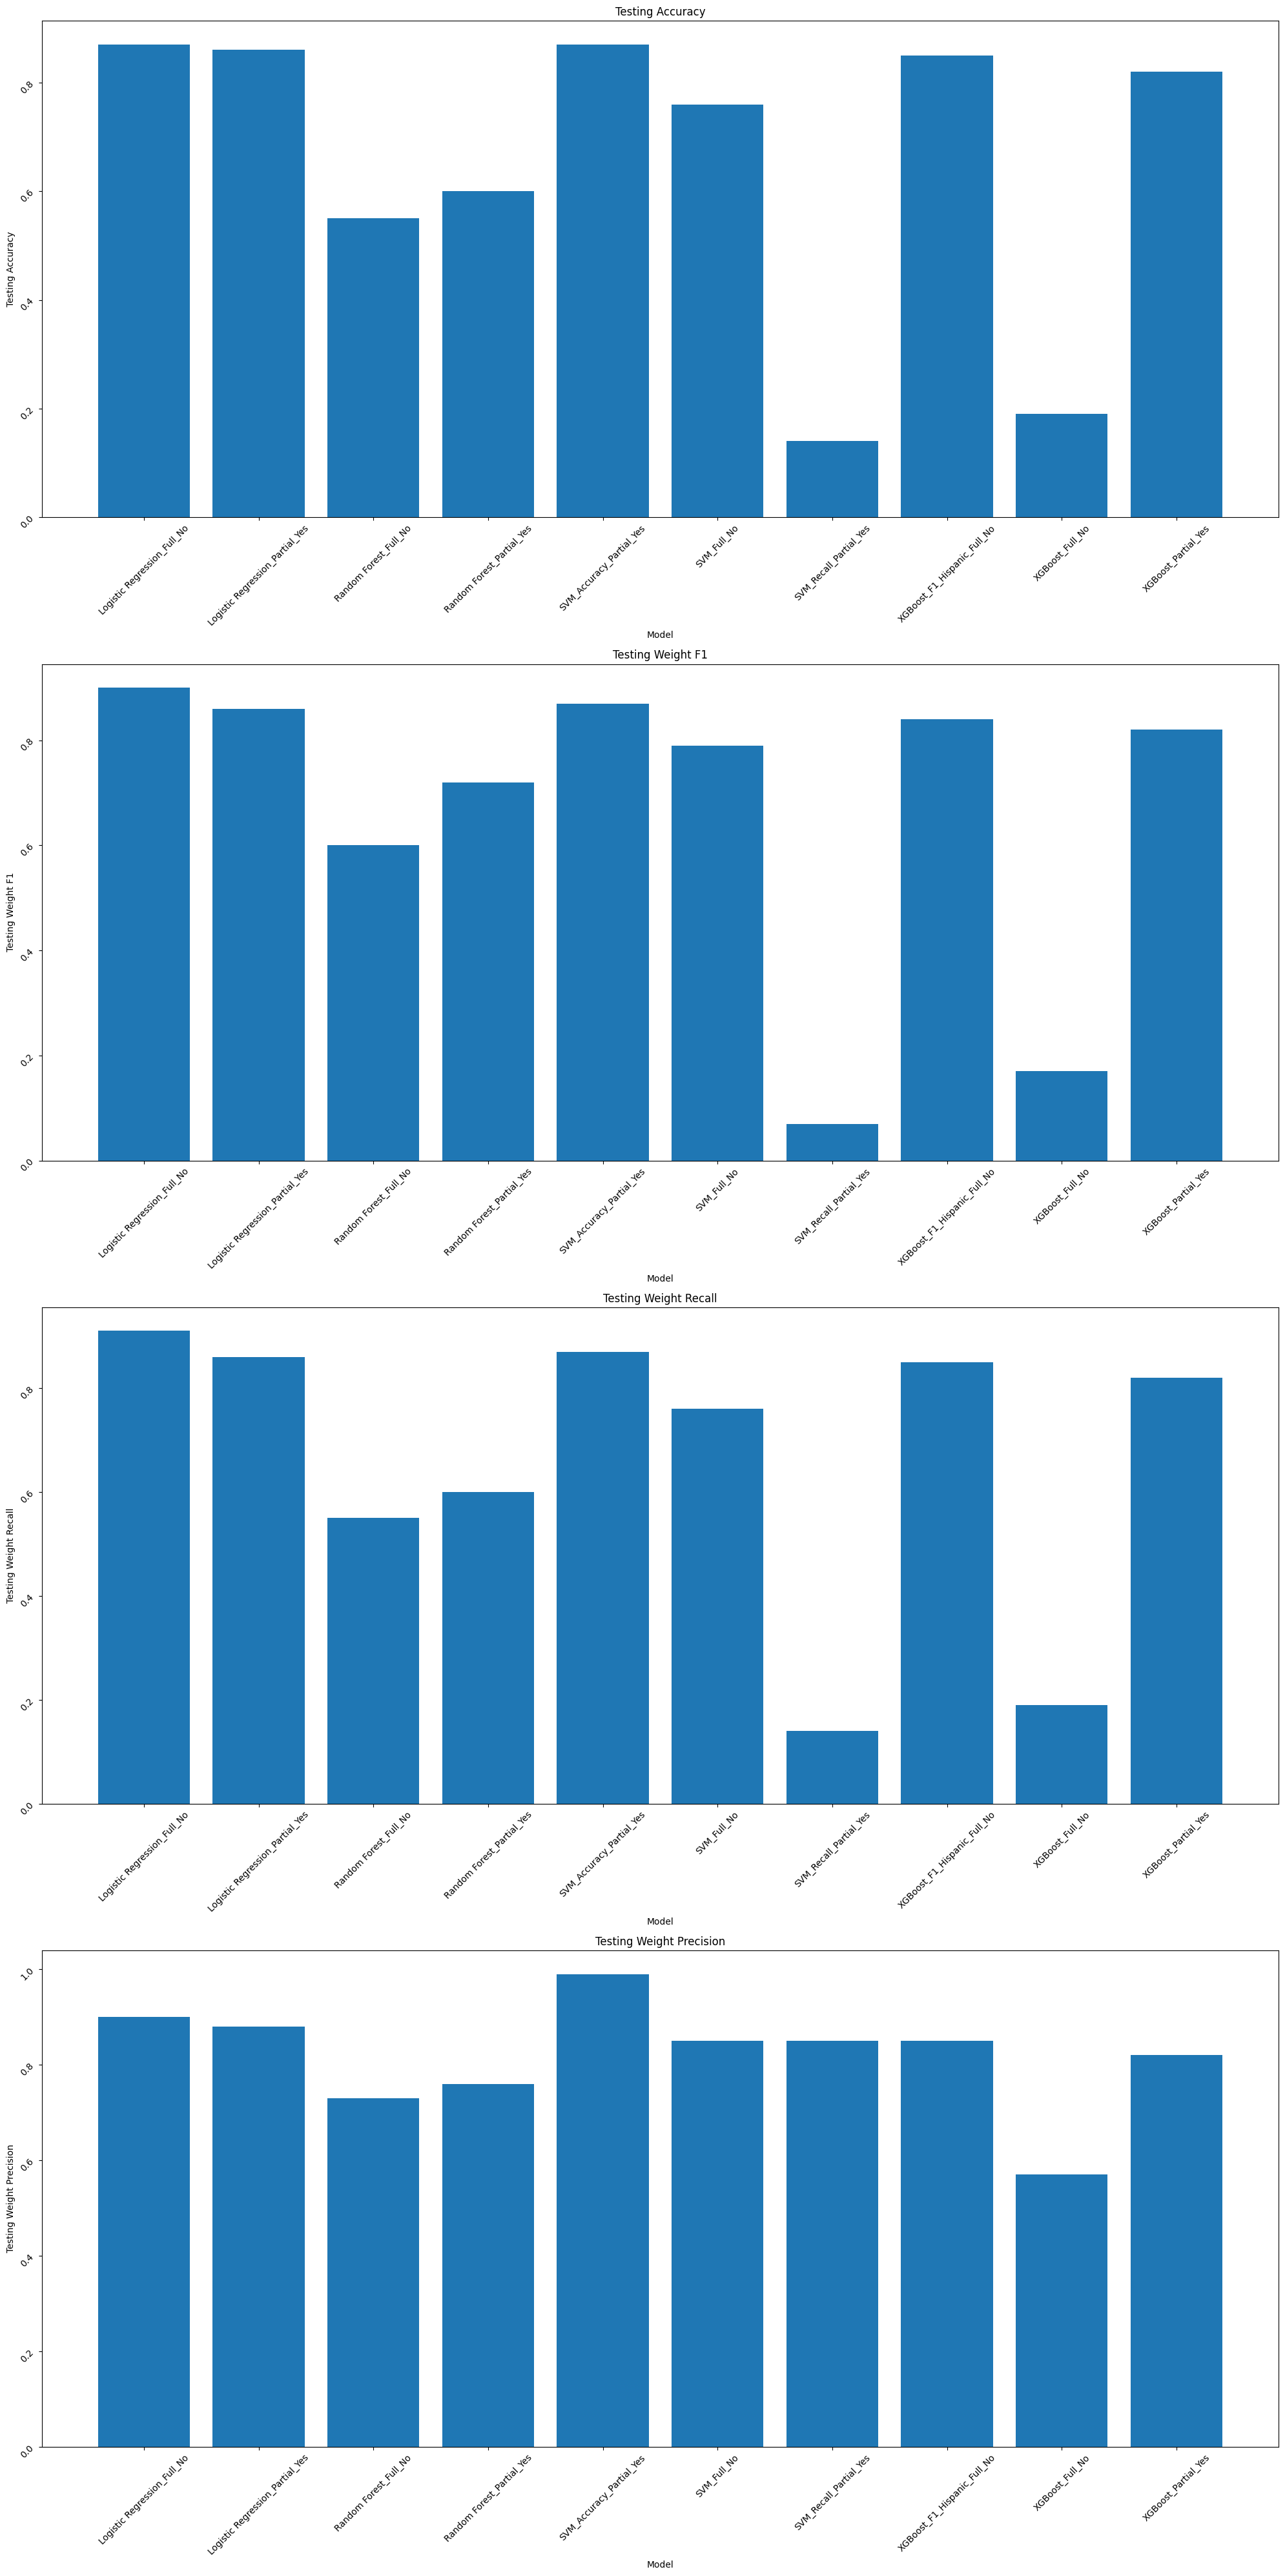

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a Pandas DataFrame from the given data
Result_df = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'XGBoost_F1_Hispanic', 'Logistic Regression', 'SVM_Recall', 'SVM_Accuracy', 'Random Forest', 'XGBoost'],
    'Features': ['Full', 'Full', 'Full', 'Full', 'Full', 'Partial', 'Partial', 'Partial', 'Partial', 'Partial'],
    'SMOTE': ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Training Accuracy': [0.87, 0.79, 0.57, 0.19, 0.94, 0.9, 0.34, 0.99, 0.72, 1.00],
    'Testing Accuracy': [0.87, 0.76, 0.55, 0.19, 0.85, 0.86, 0.14, 0.87, 0.6, 0.82],
    'Training Weight F1': [0.92, 0.81, 0.62, 0.17, 0.94, 0.90, 0.19, 0.88, 0.72, 1.00],
    'Testing Weight F1': [0.9, 0.79, 0.6, 0.17, 0.84, 0.86, 0.07, 0.87, 0.72, 0.82],
    'Training Weight Recall': [0.92, 0.79, 0.57, 0.19, 0.94, 0.9, 0.34, 0.99, 0.72, 1.00],
    'Testing Weight Recall': [0.91, 0.76, 0.55, 0.19, 0.85, 0.86, 0.14, 0.87, 0.6, 0.82],
    'Training Weight Precision': [0.92, 0.85, 0.73, 0.57, 0.94, 0.90, 0.77, 0.99, 0.72, 1.00],
    'Testing Weight Precision': [0.9, 0.85, 0.73, 0.57, 0.85, 0.88, 0.85, 0.99, 0.76, 0.82]
})

# Create a new column called ID by merging the first three columns
Result_df['Model'] = Result_df[['Algorithm', 'Features', 'SMOTE']].apply(lambda x: '_'.join(x), axis=1)

# Sort the DataFrame by the ID column
Result_df = Result_df.sort_values(by='Model')

# Create four bar plots for Accuracy testing, F1 testing, Recall testing, and Precision testing for all IDs
fig, axes = plt.subplots(4, 1, figsize=(20, 40))

for i, metric in enumerate(['Testing Accuracy', 'Testing Weight F1', 'Testing Weight Recall', 'Testing Weight Precision']):
    axes[i].bar(Result_df['Model'], Result_df[metric])
    axes[i].set_title(metric)
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)

# Rotate the x-axis labels by 45 degrees
for ax in axes:
  ax.tick_params(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
compare = pd.DataFrame(
    {
        "Model": ["LR Full_Features No_SMOTE", "SVM Full_Features No_SMOTE", "RF Full_Features No_SMOTE", "XGBoost Full_Features No_SMOTE"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

our chosen model is:
LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='saga')
<bR>


1- Fit it on the whole original dataset  (No spliting) <br>
2- After transformation  (scaling, ecndoing, etc) <br>
3- Using the hyperparameter of the model with SMOTE

In [32]:
# Split the data
X_partial = df_partial.drop(["DODRace"], axis=1)
y_partial = df_partial["DODRace"]

# from sklearn.model_selection import train_test_split

# X_train_partial, X_test_partial, y_train_partial, y_test_partial = train_test_split(
#     X_partial, y_partial, test_size=0.20, random_state=42, stratify=y_partial
# )


 # NO Spliting for training and testing in the final model <bR>
 # Partial refer to the partial features used

In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans = column_trans.set_output(transform="pandas")

In [37]:
#Using SMOTE to over sampling the data

X_encoded = column_trans.fit_transform(X_partial)

X_encoded

Gender_Female  Gender_Male  \
0             0.000        1.000   
1             0.000        1.000   
2             0.000        1.000   
3             0.000        1.000   
4             0.000        1.000   
...             ...          ...   
6063          1.000        0.000   
6064          1.000        0.000   
6065          1.000        0.000   
6066          1.000        0.000   
6067          1.000        0.000   

      WritingPreference_Either hand (No preference)  \
0                                             0.000   
1                                             0.000   
2                                             0.000   
3                                             0.000   
4                                             0.000   
...                                             ...   
6063                                          0.000   
6064                                          0.000   
6065                                          0.000   
6066                                          0.000   
6067                                          0.000   

      WritingPreference_Left hand  WritingPreference_Right hand  \
0                           0.000                         1.000   
1                           1.000                         0.000   
2                           1.000                         0.000   
3                           0.000                         1.000   
4                           0.000                         1.000   
...                           ...                           ...   
6063                        0.000                         1.000   
6064                        0.000                         1.000   
6065                        0.000                         1.000   
6066                        0.000                         1.000   
6067                        0.000                         1.000   

      SubjectsBirthLocation_Alabama  SubjectsBirthLocation_Alaska  \
0                             0.000                         0.000   
1                             0.000                         0.000   
2                             0.000                         0.000   
3                             0.000                         0.000   
4                             0.000                         0.000   
...                             ...                           ...   
6063                          0.000                         0.000   
6064                          0.000                         0.000   
6065                          0.000                         0.000   
6066                          0.000                         0.000   
6067                          0.000                         0.000   

      SubjectsBirthLocation_Antigua and Barbuda  \
0                                         0.000   
1                                         0.000   
2                                         0.000   
3                                         0.000   
4                                         0.000   
...                                         ...   
6063                                      0.000   
6064                                      0.000   
6065                                      0.000   
6066                                      0.000   
6067                                      0.000   

      SubjectsBirthLocation_Argentina  SubjectsBirthLocation_Arizona  \
0                               0.000                          0.000   
1                               0.000                          0.000   
2                               0.000                          0.000   
3                               0.000                          0.000   
4                               0.000                          0.000   
...                               ...                            ...   
6063                            0.000                          0.000   
6064                            0.000                          0.000   
6065             

In [38]:
from sklearn.linear_model import LogisticRegression
LR_Final = LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='saga')
LR_Final.fit(X_encoded, y_partial)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='saga')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___